# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [151]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from webdriver_manager.chrome import ChromeDriverManager
from scipy.signal import find_peaks

In [152]:
driver_path = ChromeDriverManager().install()

[WDM] - Downloading: 100%|█████████████████| 8.84M/8.84M [00:00<00:00, 30.0MB/s]


In [153]:
browser = Browser('chrome', executable_path = driver_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [154]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [155]:
# Create a Beautiful Soup object
html = browser.html
table_soup = soup(html, 'html.parser')

In [156]:
# Extract all rows of data
table_data = table_soup.find_all('tr', class_ = "data-row")
table_columns = table_soup.find_all('th')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [157]:
# Create an empty list
table = []

# Loop through the scraped data to create a list of rows
for data in table_data:
    data_point = []
    point = data.find_all('td')
    for each in point:
        data_point.append(each.text)
    table.append(data_point)

columns = []

for header in table_columns:
    columns.append(header.text)

In [158]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table, columns = columns)

In [159]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [160]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [161]:
# Change data types for data analysis
convert_dict = {'id': int,
                'sol': int,
                'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float}

df = df.astype(convert_dict)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format="%Y-%m-%d")

In [162]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [163]:
# 1. How many months are there on Mars?
mars_months = len(df["month"].unique())
mars_months

12

In [164]:
# 2. How many Martian days' worth of data are there?
martian_day_count = len(df["sol"].unique())
martian_day_count

1867

In [165]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

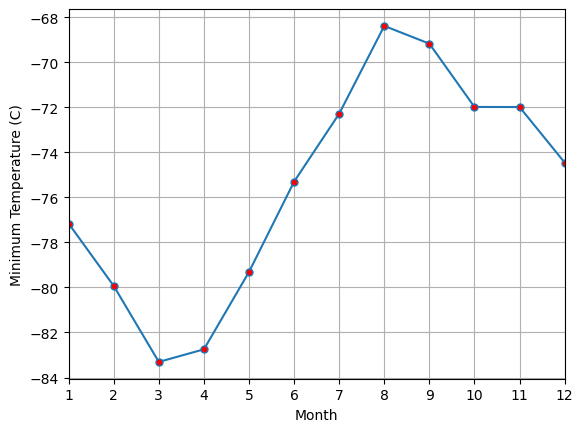

In [166]:
# Plot the average temperature by month
avg_low_temp.plot(marker = ".", markerfacecolor='red', markersize = 10)
plt.xticks(range(len(avg_low_temp)+1))
plt.xlim(1,12)
plt.xlabel("Month")
plt.ylabel("Minimum Temperature (C)")
plt.grid()
plt.show()

In [167]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_low_temp.idxmin()
hottest_month = avg_low_temp.idxmax()
print(f"{coldest_month}th month is the coldest month")
print(f"{hottest_month}th month is the hottest month")

3th month is the coldest month
8th month is the hottest month


In [168]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

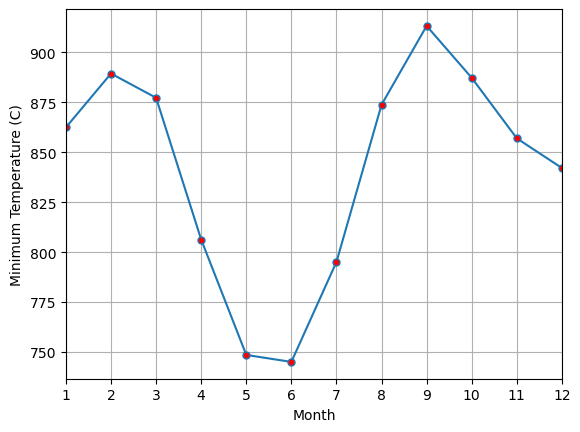

In [169]:
# Plot the average pressure by month
avg_pressure.plot(marker = ".", markerfacecolor='red', markersize = 10)
plt.xticks(range(len(avg_low_temp)+1))
plt.xlim(1,12)
plt.xlabel("Month")
plt.ylabel("Minimum Temperature (C)")
plt.grid()
plt.show()

In [170]:
# Identify the months which have the lowest and the highest atmospheric pressure on Mars
highest_month = avg_pressure.idxmax()
lowest_month = avg_pressure.idxmin()
print(f"{highest_month}th month has the highest atmospheric pressure")
print(f"{lowest_month}th month has the lowest atmospheric pressure")

9th month has the highest atmospheric pressure
6th month has the lowest atmospheric pressure


In [171]:
# 5A. How many terrestrial (earth) days are there in a Martian year?
y = df['ls']
peaks, _ = find_peaks(y)
earth_dates_at_end = list(df.iloc[peaks].terrestrial_date)
mars_year = (earth_dates_at_end[1] - earth_dates_at_end[0]).days
print(f"There are {mars_year} terrestrial days in a Martian year")

There are 687 terrestrial days in a Martian year


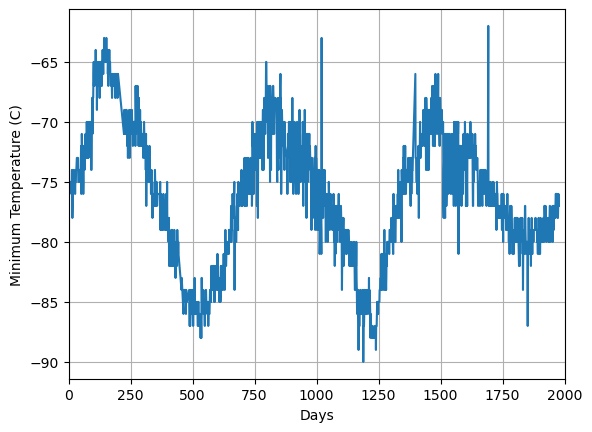

In [172]:
# 5B. Visualize 5A using min_temp.
df.plot(x = 'sol', y = "min_temp", legend = False)
plt.xlabel('Days')
plt.ylabel('Minimum Temperature (C)')
plt.xlim(0,2000)
plt.grid()
plt.show()

Visually observing the plot between min_temp and days, the interval between the peaks seems to approximately 680 (1480-800) days. Note, this is very close to the 687 days found in part 5A.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [173]:
# Write the data to a CSV
df.to_csv('mars_data.csv')

In [174]:
browser.quit()